# 第十七次作业

负责助教：杨礼铭，陈滨琪

截止时间：2023年5月14日周日 23:59

## 第零题 词向量可视化

In [110]:
# 使用预训练模型获取词向量
import gensim
from gensim.models import KeyedVectors
import gensim.downloader as api
import matplotlib.pyplot as plt
import numpy as np

# 下载预训练模型
#model = api.load("glove-wiki-gigaword-50")
# 如果无法下载，运行下面的代码读取词向量
model = KeyedVectors.load_word2vec_format('./glove-wiki-gigaword-50.gz')

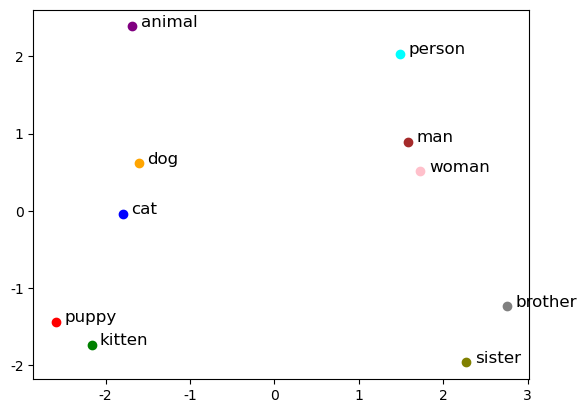

In [111]:
words = ["cat", "dog", "kitten", "puppy", "animal" ,"man", "woman", "brother", "sister", "person"]
# 对给出的词向量降维到2维，并且绘制散点图
# 可以看出比较好地区分了动物相关的词与人相关的词，并且词意相近的词在二维空间中也比较接近
from sklearn.decomposition import PCA
vector = []
for word in words:
    vector.append(model.get_vector(word))
vector = np.array(vector,dtype=np.float32)
pca = PCA(2)
X = pca.fit_transform(vector)
x = X[:,0]
y = X[:,1]
color = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i in range(len(words)):
    plt.scatter(x[i],y[i], c=color[i])
    plt.annotate(words[i], xy=(x[i]+0.1,y[i]), fontsize=12)
plt.show()

## 第一题 Word2Vec

本题目我们使用Gensim包。Gensim是一款开源的第三方Python工具包，用于从原始的非结构化的文本中，无监督地学习到文本隐层的主题向量表达。
Gensim 提供了一系列强大的算法，如：

- Word2Vec：一种用于生成词向量的神经网络模型，能捕捉单词之间的语义和句法关系。
- FastText：一种类似 Word2Vec 的模型，但它可以处理词汇表外的单词，因为它基于字符级别的 n-gram 表示。
- Doc2Vec：扩展了 Word2Vec 的概念，可以生成整个文档或句子的向量表示。
- Latent Semantic Analysis (LSA)：一种用于降维和检索文档结构的统计技术。
- Latent Dirichlet Allocation (LDA)：一种广泛使用的主题模型算法，可以发现文档集合中的潜在主题。

安装Gensim：``pip install gensim``

参考网站：https://radimrehurek.com/gensim/


##### 加载预训练模型

gensim提供了一些语料和模型，可以通过数据接口下载。下载得到的模型默认保存在'~/gensim-data'目录下，详见https://github.com/RaRe-Technologies/gensim-data

使用接口下载并载入名为"glove-wiki-gigaword-50"的预训练模型。

In [112]:
import gensim
from gensim.models import KeyedVectors
import gensim.downloader as api
# 若已经运行第0题，则无需继续运行以下内容
# 下载预训练模型
#model = api.load("glove-wiki-gigaword-100")
# 如果无法下载，运行下面的代码读取词向量
#model = KeyedVectors.load_word2vec_format('./glove-wiki-gigaword-50.gz')

### 1.1 请用载入的词向量模型完成以下几点：

1. 查看'dog'的词向量（0.5分）

2. 计算'dog'和'pet'的相似程度（0.5分）

3. 输出与'dog'最相似的十个词（1分）

提示：model里有非常多实用的方法，可以便捷地解决问题

In [113]:
# TODO:
dog_vector=model["dog"]
print("Vector for 'dog':")
print(dog_vector)

similarity=model.similarity("dog","pet")
print(f"Similarity between 'dog' and 'pet': {similarity}")

dog_most_similar_words=model.most_similar("dog",topn=10)
print("Top 10 words similar to 'dog'")
for word,similarity in dog_most_similar_words:
    print(f"{word}: {similarity}")

Vector for 'dog':
[ 0.11008   -0.38781   -0.57615   -0.27714    0.70521    0.53994
 -1.0786    -0.40146    1.1504    -0.5678     0.0038977  0.52878
  0.64561    0.47262    0.48549   -0.18407    0.1801     0.91397
 -1.1979    -0.5778    -0.37985    0.33606    0.772      0.75555
  0.45506   -1.7671    -1.0503     0.42566    0.41893   -0.68327
  1.5673     0.27685   -0.61708    0.64638   -0.076996   0.37118
  0.1308    -0.45137    0.25398   -0.74392   -0.086199   0.24068
 -0.64819    0.83549    1.2502    -0.51379    0.04224   -0.88118
  0.7158     0.38519  ]
Similarity between 'dog' and 'pet': 0.7724707722663879
Top 10 words similar to 'dog'
cat: 0.9218006134033203
dogs: 0.8513158559799194
horse: 0.7907583117485046
puppy: 0.7754921317100525
pet: 0.7724707722663879
rabbit: 0.7720814347267151
pig: 0.7490062117576599
snake: 0.7399188876152039
baby: 0.7395570874214172
bite: 0.738793671131134


### 1.2 使用预训练 Word2Vec 模型找到不属于同一类的单词（1分）
在给定的单词列表 ['cat', 'dog', 'fish', 'bird', 'pigs', 'computer'] 中，找到与其他单词不属于同一类的单词。 注：参考方法：model.doesnt_match

In [114]:
# 使用已加载的预训练模型
# model = api.load("glove-wiki-gigaword-100") 或 model = KeyedVectors.load_word2vec_format('./glove-wiki-gigaword-50.gz')

words = ['cat', 'dog', 'fish', 'bird', 'pigs', 'computer']

# TODO:

odd_one_out=model.doesnt_match(words)
print(f"The word that doesn't belong to the same category: {odd_one_out}")


The word that doesn't belong to the same category: computer


### 1.3 使用预训练 Word2Vec 模型解决类比问题（1分）
请使用词向量之间的关系，解决类比问题 " Japan is to Tokyo as France is to ?"

注意，这里城市名称和国家名称都是小写，否则词表中找不到

计算得到目标向量后，可以使用model.similar_by_vector得到相似单词

In [115]:
# 解决类比问题 "Japan is to Tokyo as France is to ?"
# japan - tokyo ≈ france - ?

# TODO:
target_word=-model["japan"]+model["tokyo"]+model["france"]
result_word=model.similar_by_vector(target_word)[0][0]
print("Result of the analogy 'japan is to tokyo as france is to':", result_word)


Result of the analogy 'japan is to tokyo as france is to': paris


## 第二题：时间序列分析
本次作业中，我们将使用'./Stock_Price.csv'中的股票数据进行时间序列分析。数据包含了TWTR、KO和GM三个股票的价格。

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('./Stock_Price.csv')
df.head()


,Date,TWTR,KO,GM
0,2013-11-07,44.900002,30.350573,27.762348
1,2013-11-08,41.650002,30.518206,28.334280
2,2013-11-11,42.900002,30.381044,28.349743
3,2013-11-12,41.900002,30.388666,28.334280
4,2013-11-13,42.599998,30.571535,29.710032


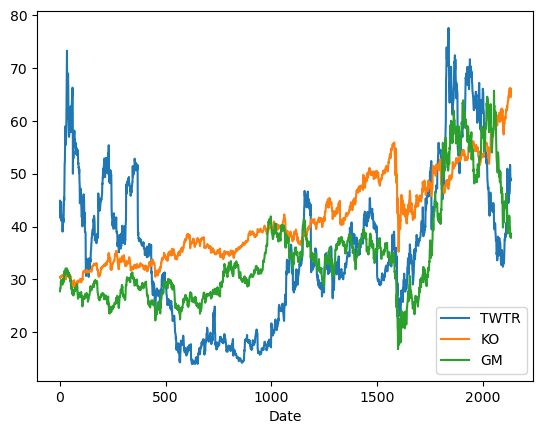

In [117]:
#plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
df[['TWTR', 'KO', 'GM']].plot()
plt.xlabel('Date')
plt.show()

### 2.1 滑动窗口均值与标准差（2分）
选定一个滑动窗口大小（如30），在滑动窗口内计算均值与标准差，并绘制图像。

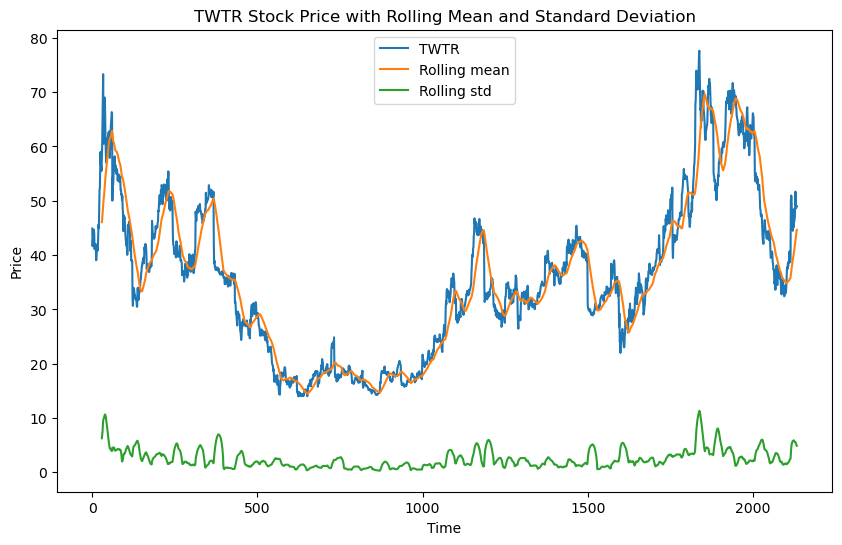

In [118]:
# 以TWTR股票为例
stock_data = df['TWTR']

# TODO:
window_size=30
rolling_mean=stock_data.rolling(window=window_size).mean()
rolling_std=stock_data.rolling(window=window_size).std()

plt.figure(figsize=(10, 6))
plt.plot(stock_data, label="TWTR")
plt.plot(rolling_mean, label='Rolling mean')
plt.plot(rolling_std, label='Rolling std')
plt.title(f'{"TWTR"} Stock Price with Rolling Mean and Standard Deviation')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### 2.2 成分分解（2分）
对序列进行加法或乘法成分分解，并绘制图像。具体可见https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

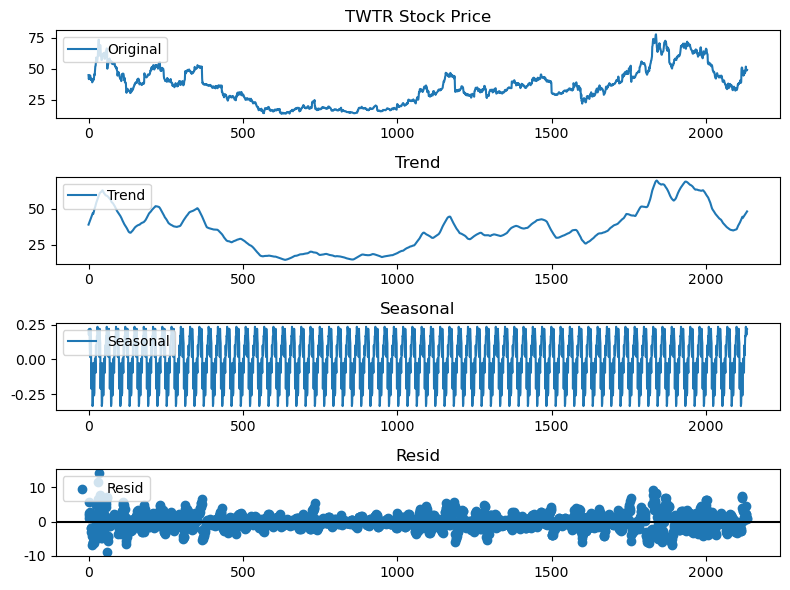

In [122]:
# TODO:
ss_decomposition=seasonal_decompose(x=stock_data,model='additive',extrapolate_trend='freq',period=30)
trend=ss_decomposition.trend
seasonal=ss_decomposition.seasonal
residual=ss_decomposition.resid



# 绘制分解图表
plt.figure(figsize=(8, 6))

plt.subplot(411)
plt.title("TWTR Stock Price")
plt.plot(stock_data, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.title("Trend")
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.title("Seasonal")
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.title("Resid")
plt.scatter(residual.index,residual.values, label='Resid')
plt.axhline(0, color='black', linestyle='-')
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()




### 平稳序列（2分）
对序列迭代地进行差分，直到得到一个平稳序列(p_value<0.05)，绘制最终得到的序列及其自相关图。有能力的同学可以尝试其他方法，可作为加分项。（加分2分以内）

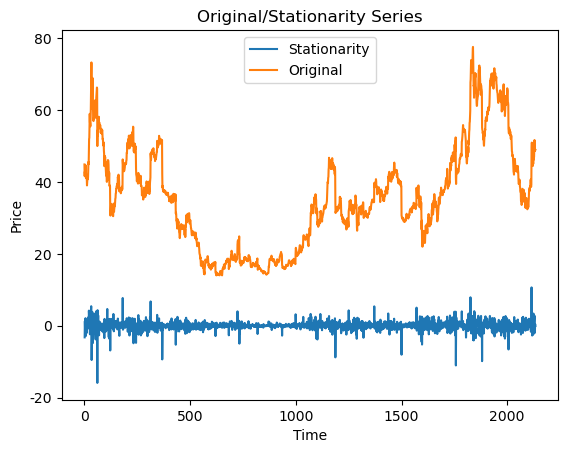

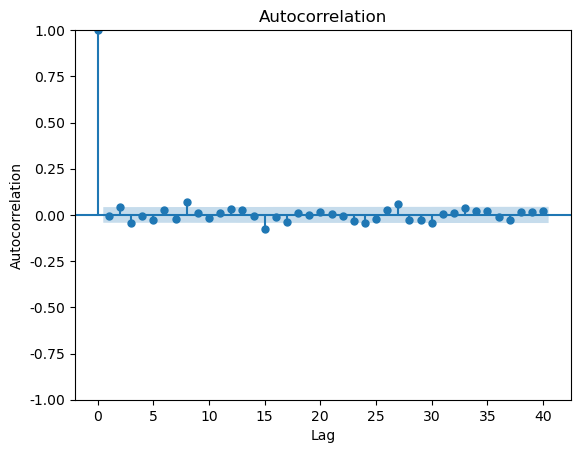

In [120]:
from statsmodels.graphics.tsaplots import plot_acf
stock_data_d=np.array(stock_data)
while adfuller(stock_data_d)[1]>=0.05:
    stock_data_d=np.diff(stock_data)

plt.plot(stock_data.index[-len(stock_data_d):],stock_data_d,label="Stationarity")
plt.plot(stock_data.index,stock_data,label="Original")
plt.title("Original/Stationarity Series")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

plot_acf(stock_data_d, lags=40)
plt.title("Autocorrelation")
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()
